<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series EDA

_Author: Unknown_

----
This lab will walk you through performing exploratory data analysis on a dataset of weekly chickenpox cases from Hungary. This dataset is from the UCI Machine Learning Repository. You can read more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Hungarian+Chickenpox+Cases).

-----

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Only using one county
pox = pd.read_csv('data/hungary_chickenpox.csv')[['Date', 'BUDAPEST']]

# Renaming columns for readability
pox.columns = ['date', 'budapest_cases']
pox.head(10)

,date,budapest_cases
0,03/01/2005,168
1,10/01/2005,157
2,17/01/2005,96
3,24/01/2005,163
4,31/01/2005,122
5,07/02/2005,174
6,14/02/2005,153
7,21/02/2005,115
8,28/02/2005,119
9,07/03/2005,114


**Check the dataframe dtypes**

In [3]:
pox.dtypes

#date is a object which is not suitable for time series analysis

date              object
budapest_cases     int64
dtype: object

**Check for nulls**

In [4]:
pox.isnull().sum()
#no missing values

date              0
budapest_cases    0
dtype: int64

**Casting the `'Date'` column to a datetime type**

Use `pd.to_datetime` to convert the `Date` column to a datetime.

**WARNING**: The date column is formated as day-month-year. Does `pd.to_datetime` work the way you expect it to on day/month/year strings? If it doesn't work the way you expect it to, check [the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) for `pd.to_datetime`, and see if one of the settings fixes things.

In [5]:
pox['date'] = pd.to_datetime(pox['date'], format='%d/%m/%Y')

In [6]:
pox['date'].sort_values()

0     2005-01-03
1     2005-01-10
2     2005-01-17
3     2005-01-24
4     2005-01-31
         ...    
517   2014-12-01
518   2014-12-08
519   2014-12-15
520   2014-12-22
521   2014-12-29
Name: date, Length: 522, dtype: datetime64[ns]

**Set the `'Date'` column to be the index**

In [7]:
pox.set_index('date', inplace= True)
pox.head()

,budapest_cases
date,
2005-01-03,168
2005-01-10,157
2005-01-17,96
2005-01-24,163
2005-01-31,122


---

Now that our data is formatted appropriately, we can embark on EDA.

### Summary statistics

**What times does the dataset describe?**

That is, what's the earliest date in the dataset, and what's the latest date?

In [8]:
# 2005-01-03 is earliest date in the dataset
# 2014-12-29 is the latest date

**Plot a histogram of the Budapest cases column**

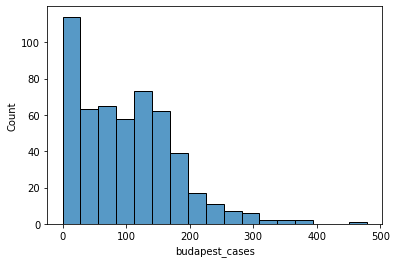

In [9]:
sns.histplot(data=pox, x="budapest_cases");
#right skewed distribution

**How many cases were there per year?**

Recall that with time series data, we can't simply group by on the year. You'll need to use the `resample` method on the DataFrame to answer this question.

In [10]:
pox.resample('Y').mean()

,budapest_cases
date,
2005-12-31,87.730769
2006-12-31,124.961538
2007-12-31,119.075472
2008-12-31,85.403846
2009-12-31,106.288462
2010-12-31,100.423077
2011-12-31,103.923077
2012-12-31,101.000000
2013-12-31,99.173077


### Visualizations

**Make a line plot of chickenpox cases**

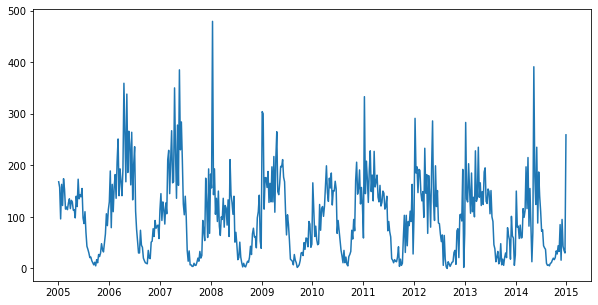

In [12]:
plt.figure(figsize= (10,5))
plt.plot(pox['budapest_cases']);

**In short answer format, describe any apparent trends**

In [ ]:
#the long trend is pretty stable. There seems to be seasonality of the data.

### Plot rolling averages

Plot the weekly chickenpox cases, but on the same graph, also plot the 4-week and 12-week rolling averages.

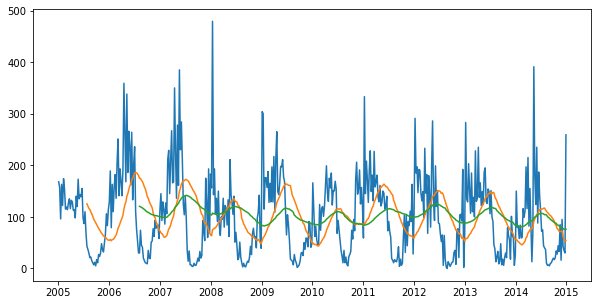

In [13]:
plt.figure(figsize= (10,5))
plt.plot(pox['budapest_cases'])
plt.plot(pox['budapest_cases'].rolling(30).mean())
plt.plot(pox['budapest_cases'].rolling(84).mean());

In [ ]:
# the fluctuation of data is smoother with  rolling average graph

### Plot yearly chickenpox cases

You may need to use `resample` again for this.

In [14]:
case_yearly = pox.resample('Y').mean()

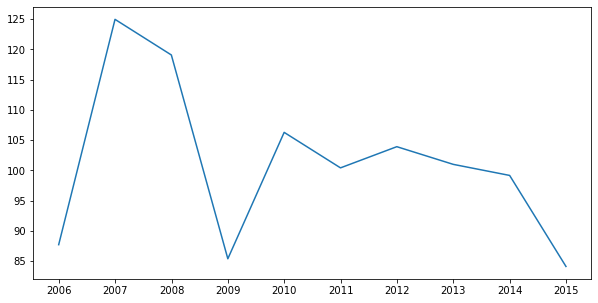

In [17]:
plt.figure(figsize= (10,5))
plt.plot(case_yearly['budapest_cases']);